In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math


import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [4]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
34238      NaN       NaN  International 2020-02-28        705.0        0.0   
34239      NaN       NaN  International 2020-02-29        705.0        0.0   
34240      NaN       NaN  International 2020-03-01        705.0        0.0   
34241      NaN       NaN  International 2020-03-02        705.0        0.0   
34242      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
34238           4.0         0.0                      NaN   
34239           6.0         2.0                      NaN   
34240           6.0         0.0                      NaN   
34241           6.0         0.0                      NaN   
34242           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                        0.0  ...          1.337        1803.987   
1                        0.0  ...          1.337        1803.987   
2                        0.0  ...          1.337        1803.987   
3                        0.0  ...          1.337        1803.987   
4                        0.0  ...          1.337        1803.987   
...                      ...  ...            ...             ...   
34238                    NaN  ...            NaN             NaN   
34239                    NaN  ...            NaN             NaN   
34240                    NaN  ...            NaN             NaN   
34241                    NaN  ...            NaN             NaN   
34242                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                597.029                 9.59   
1                  NaN                597.029                 9.59   
2                  NaN                597.029                 9.59   
3                  NaN                597.029                 9.59   
4                  NaN                597.029                 9.59   
...                ...                    ...                  ...   
34238              NaN                    NaN                  NaN   
34239              NaN                    NaN                  NaN   
34240              NaN                    NaN                  NaN   
34241              NaN                    NaN                  NaN   
34242              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                  37.746   
1                 NaN           NaN                  37.746   
2                 NaN           NaN                  37.746   
3                 NaN           NaN                  37.746   
4                 NaN           NaN                  37.746   
...               ...           ...                     ...   
34238             NaN           NaN                     NaN   
34239             NaN           NaN                     NaN   
34240             NaN           NaN                     NaN   
34241             NaN           NaN                     NaN 

### Analysis of the last 120 days

In [5]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta("120day")]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date          location  total_cases  total_deaths  new_cases  \
33581 2020-04-15             Yemen          1.0           0.0        0.0   
24119 2020-04-07  Papua New Guinea          1.0           0.0        0.0   
33595 2020-04-29             Yemen          1.0           0.0        0.0   
33594 2020-04-28             Yemen          1.0           0.0        0.0   
33593 2020-04-27             Yemen          1.0           0.0        0.0   
...          ...               ...          ...           ...        ...   
34178 2020-08-02             World   17841669.0      685281.0   261827.0   
13957 2020-04-30         Hong Kong          NaN           NaN        NaN   
13958 2020-05-31         Hong Kong          NaN           NaN        NaN   
13959 2020-06-30         Hong Kong          NaN           NaN        NaN   
13960 2020-07-28         Hong Kong          NaN           NaN        NaN   

       new_deaths  
33581         0.0  
24119         0.0  
33595         0.0  
33594         0.0  
33593         0.0  
...           ...  
34178      5779.0  
13957         NaN  
13958         NaN  
13959         NaN  
13960         NaN  

[25077 rows x 6 columns]

# 1. Number of cases and deaths in World

In [6]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date  total_cases  total_deaths  new_cases  new_deaths
0   2020-04-05    1203897.0       66177.0    85256.0      6278.0
1   2020-04-06    1270227.0       70925.0    66330.0      4748.0
2   2020-04-07    1343198.0       76272.0    72971.0      5347.0
3   2020-04-08    1420190.0       83837.0    76992.0      7565.0
4   2020-04-09    1505177.0       90389.0    84987.0      6552.0
..         ...          ...           ...        ...         ...
115 2020-07-29   16713047.0      660143.0   243602.0      6260.0
116 2020-07-30   17011169.0      666862.0   298122.0      6719.0
117 2020-07-31   17301496.0      673293.0   290327.0      6431.0
118 2020-08-01   17579842.0      679502.0   278346.0      6209.0
119 2020-08-02   17841669.0      685281.0   261827.0      5779.0

[120 rows x 5 columns]

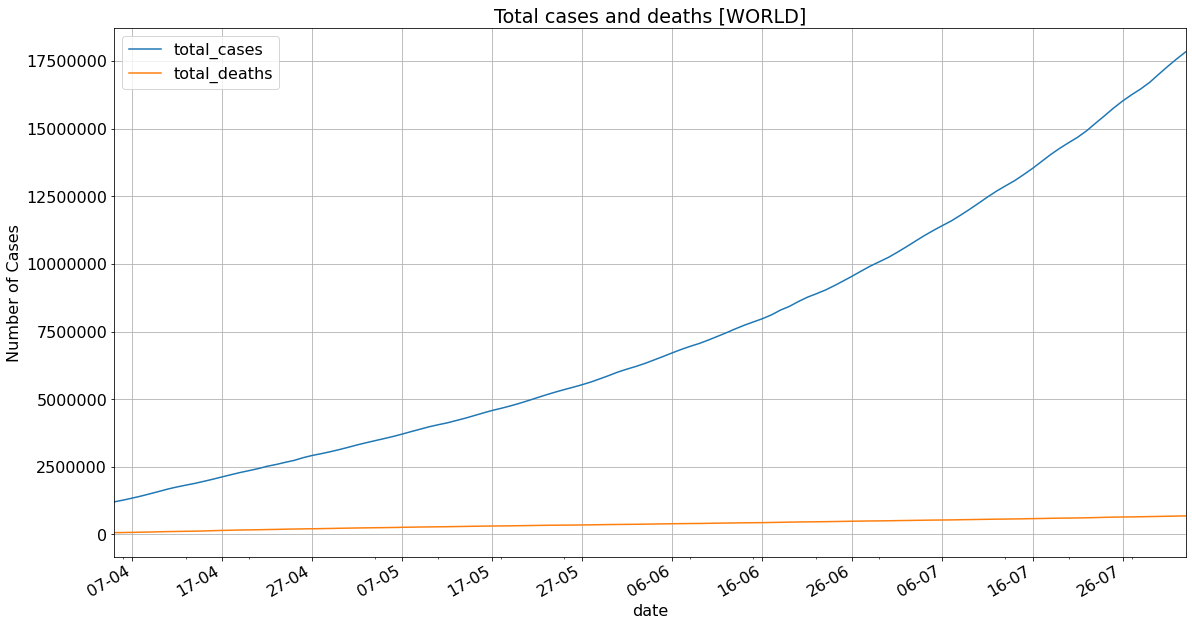

In [7]:
dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases and deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New deaths per day

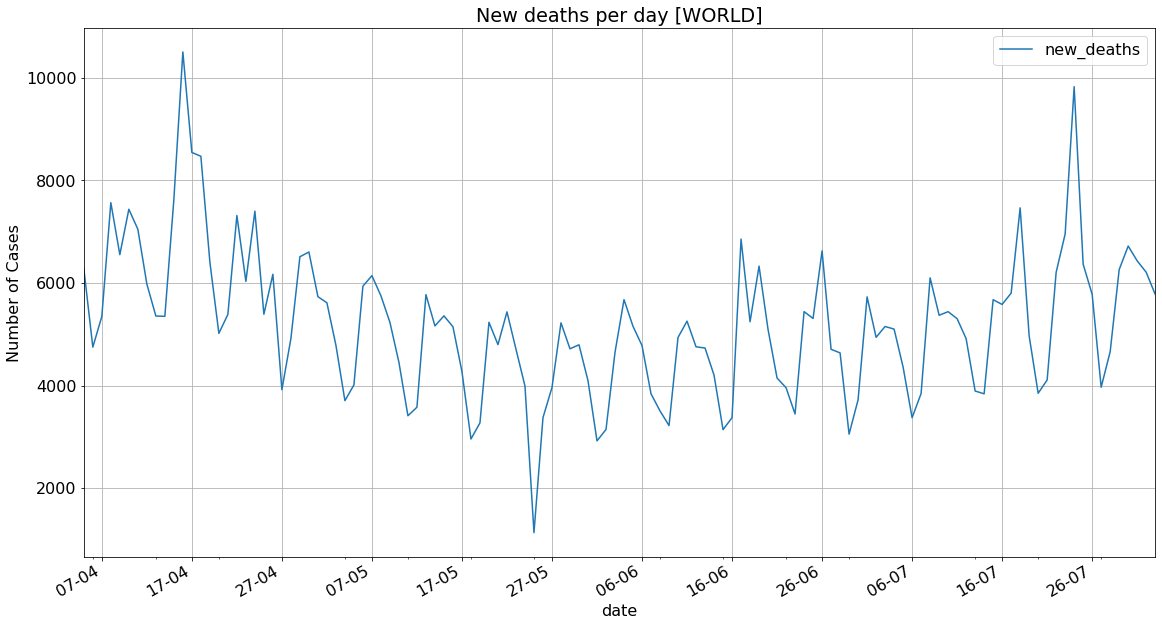

In [8]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New cases per day

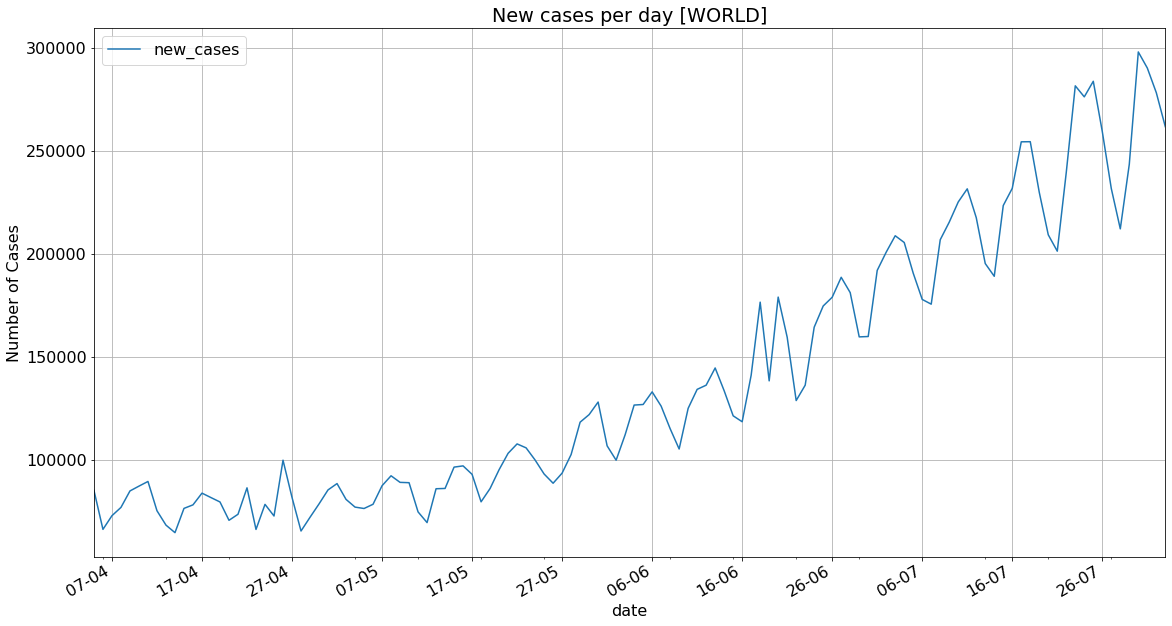

In [9]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [10]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

date        location  total_cases  total_deaths  new_cases  \
32567 2020-08-02   United_States    4620444.0      154447.0    58407.0   
32566 2020-08-01   United_States    4562037.0      153314.0    67023.0   
32565 2020-07-31   United_States    4495014.0      152070.0    68032.0   
32564 2020-07-30   United_States    4426982.0      150713.0    74985.0   
32563 2020-07-29   United_States    4351997.0      149256.0    61734.0   
...          ...             ...          ...           ...        ...   
32281 2020-05-24  United_Kingdom     243081.0       36734.0     2062.0   
32280 2020-05-23  United_Kingdom     241019.0       36451.0     2574.0   
32279 2020-05-22  United_Kingdom     238445.0       36093.0     2718.0   
32278 2020-05-21  United_Kingdom     235727.0       35755.0     3052.0   
32277 2020-05-20  United_Kingdom     232675.0       35386.0     2589.0   

       new_deaths  
32567      1133.0  
32566      1244.0  
32565      1357.0  
32564      1457.0  
32563      1245.0  
...           ...  
32281       283.0  
32280       358.0  
32279       338.0  
32278       369.0  
32277       548.0  

[281 rows x 6 columns]

In [11]:
myDate = df['date'].astype(str).unique()

### Countries that have, at least, 50k cases and 35k deaths

In [12]:
dfCountry = mainCountries['location'].astype(str).unique()
pd.DataFrame(dfCountry)

0
0   United_States
1          Brazil
2           India
3          Mexico
4  United_Kingdom
5           Italy

In [13]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

## Total cases in the main countries

In [14]:
totalCases_list=[]
totalDeaths_list=[]
for index in range(len(dfCountry)):  
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    header = [dfCountry[index]]
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)

In [15]:
dfTotalCases = []
dfTotalDeaths = []
for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)

dfTotalCases.insert(0, 'date', myDate)
dfTotalDeaths.insert(0, 'date', myDate)

### Total Cases per Country

In [16]:
dfTotalCases.sort_values(by=['date'], ascending=False)

date  United_States    Brazil     India    Mexico  United_Kingdom  \
65  2020-08-02      1961185.0  707412.0  266598.0  120102.0        264760.0   
62  2020-08-01      1897838.0  645762.0  236657.0  110026.0        262118.0   
64  2020-07-31      1942363.0  691758.0  256611.0  117103.0        264039.0   
61  2020-07-30      1872660.0  614932.0  226770.0  105680.0        260875.0   
51  2020-07-29      1662302.0  374898.0  145380.0   71105.0        245972.0   
..         ...            ...       ...       ...       ...             ...   
22  2020-04-09       965910.0   61888.0   27892.0   14677.0        154242.0   
23  2020-04-08       988451.0   66501.0   29435.0   15529.0        157715.0   
1   2020-04-07       337635.0   11130.0    4067.0    2143.0         57180.0   
13  2020-04-06       702164.0   33682.0   14378.0    6875.0        111735.0   
24  2020-04-05      1012583.0   71886.0   31332.0   16752.0        162421.0   

       Italy  
65  235278.0  
62  234531.0  
64  234998.0  
61  234013.0  
51  230158.0  
..       ...  
22  197675.0  
23  199414.0  
1   128948.0  
13  172434.0  
24  201505.0  

[120 rows x 7 columns]

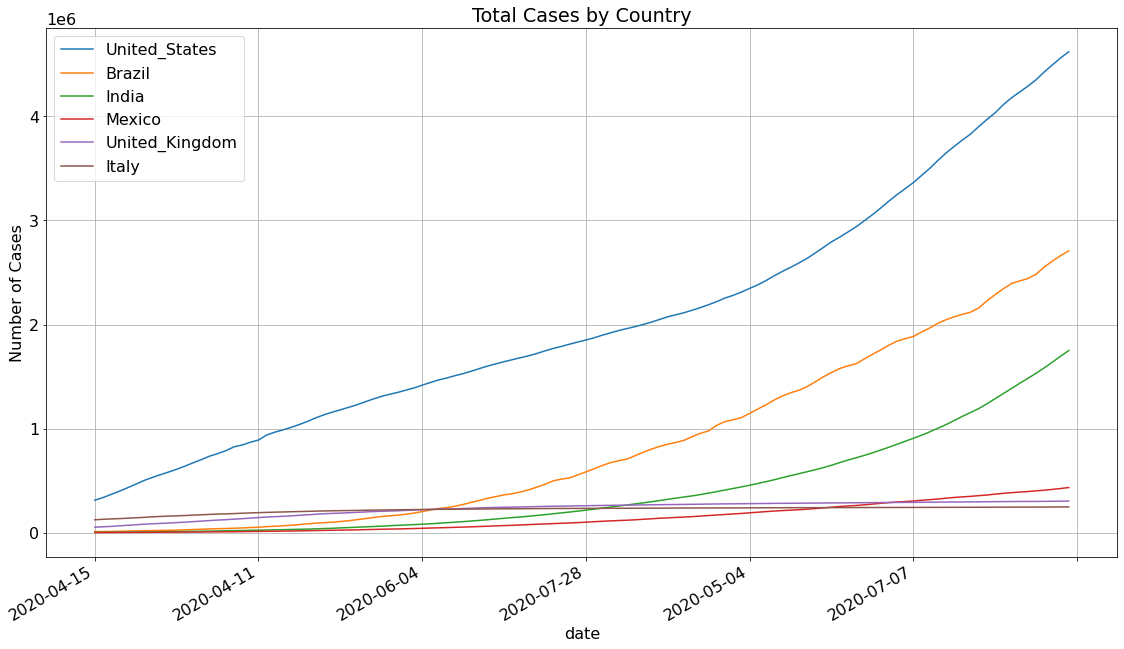

In [17]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total Cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

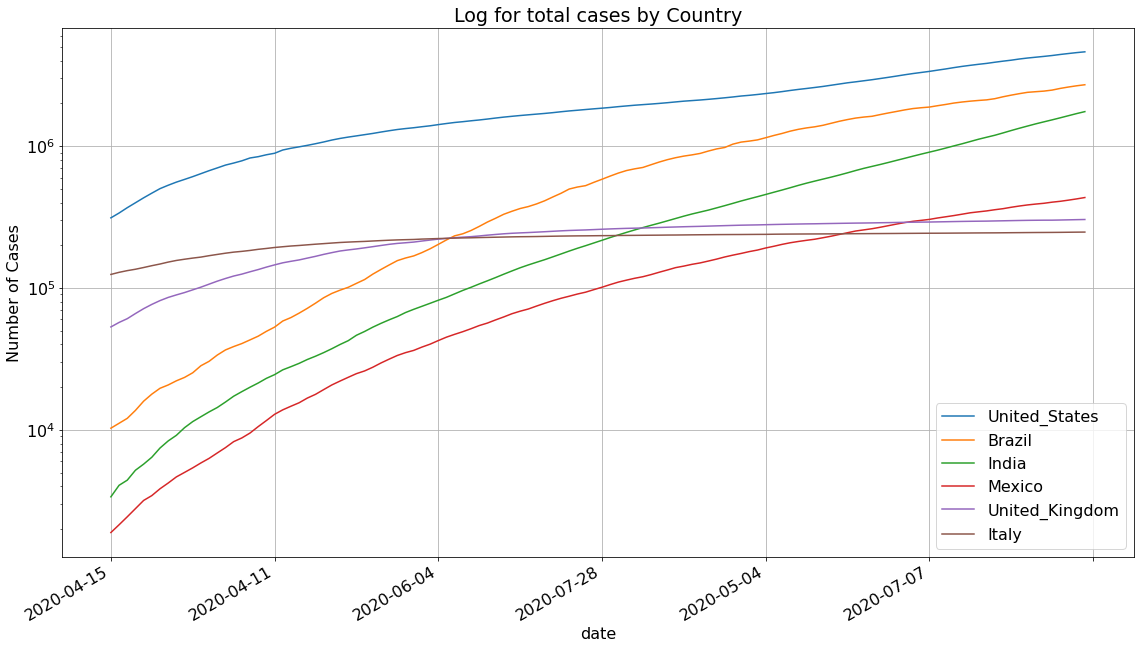

In [18]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log for total cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total Deaths per Countries

In [19]:
dfTotalDeaths.sort_values(by=['date'], ascending=False)

date  United_States   Brazil   India   Mexico  United_Kingdom  \
65  2020-08-02       111007.0  37134.0  7466.0  14053.0         40686.0   
62  2020-08-01       109143.0  35026.0  6642.0  13170.0         40347.0   
64  2020-07-31       110514.0  36455.0  7135.0  13699.0         40631.0   
61  2020-07-30       108211.0  34021.0  6348.0  12545.0         39989.0   
51  2020-07-29        98220.0  23473.0  4167.0   7633.0         37297.0   
..         ...            ...      ...     ...      ...             ...   
22  2020-04-09        54876.0   4205.0   872.0   1351.0         24070.0   
23  2020-04-08        56245.0   4543.0   934.0   1434.0         24408.0   
1   2020-04-07         9647.0    486.0   109.0     94.0          5866.0   
13  2020-04-06        37054.0   2141.0   480.0    546.0         16892.0   
24  2020-04-05        58355.0   5017.0  1007.0   1569.0         25319.0   

      Italy  
65  33964.0  
62  33774.0  
64  33899.0  
61  33689.0  
51  32877.0  
..      ...  
22  26644.0  
23  26977.0  
1   15889.0  
13  22747.0  
24  27359.0  

[120 rows x 7 columns]

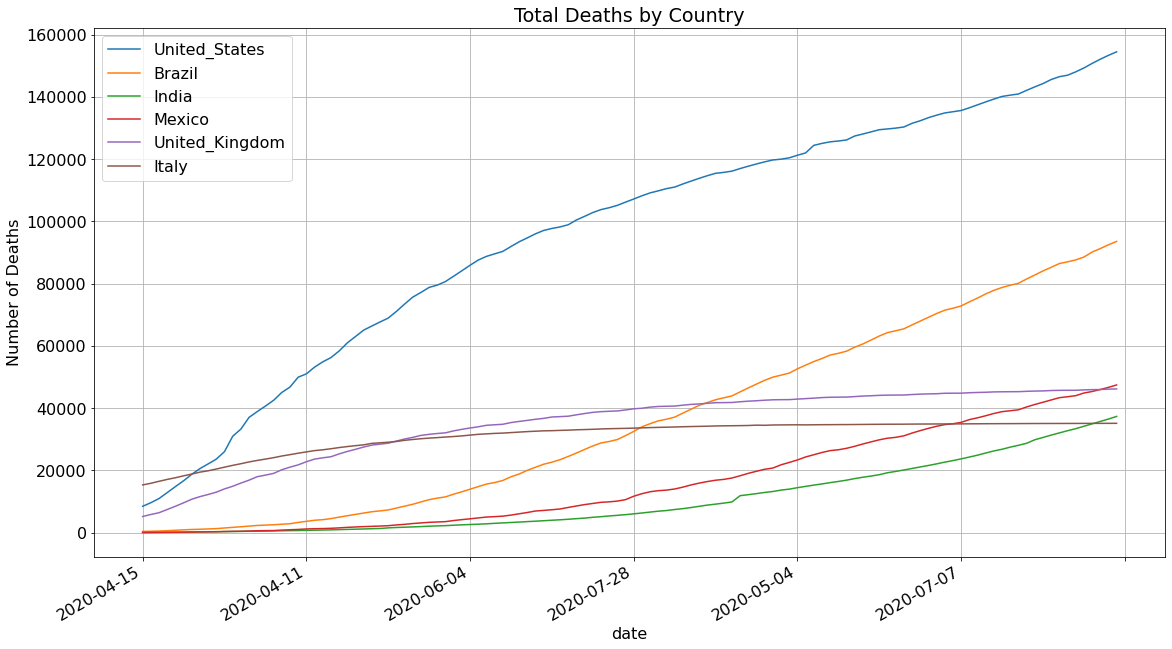

In [20]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths by Country')

ax = plt.gca()
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

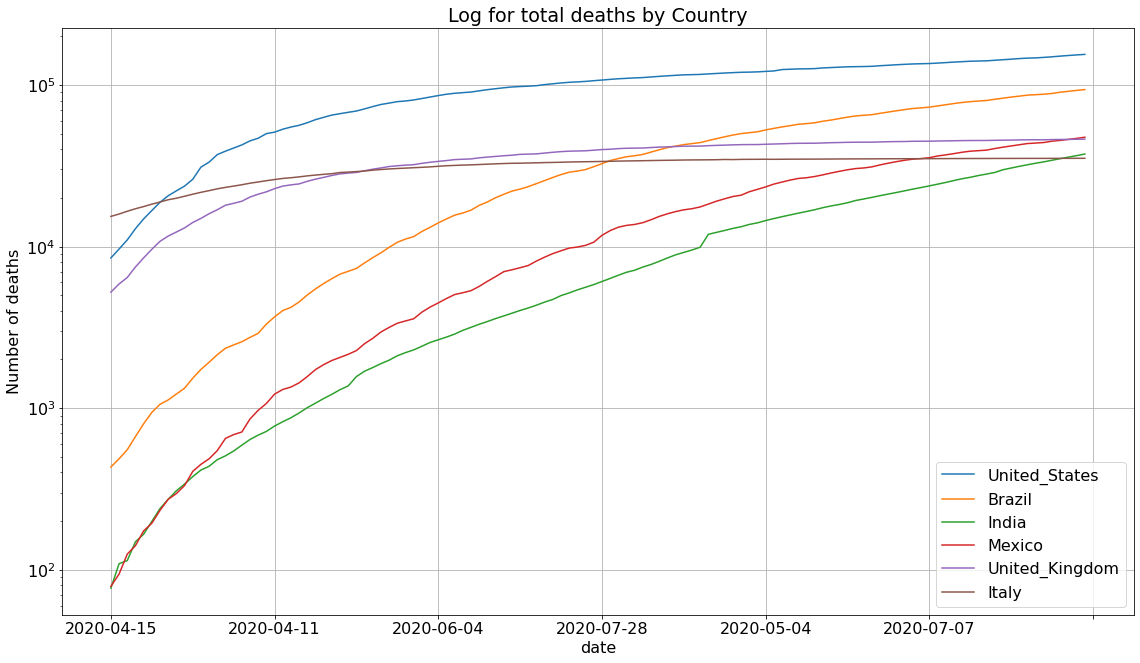

In [21]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))
plt.title('Log for total deaths by Country')
plt.ylabel('Number of deaths')
plt.grid()

### New cases and new deaths per day

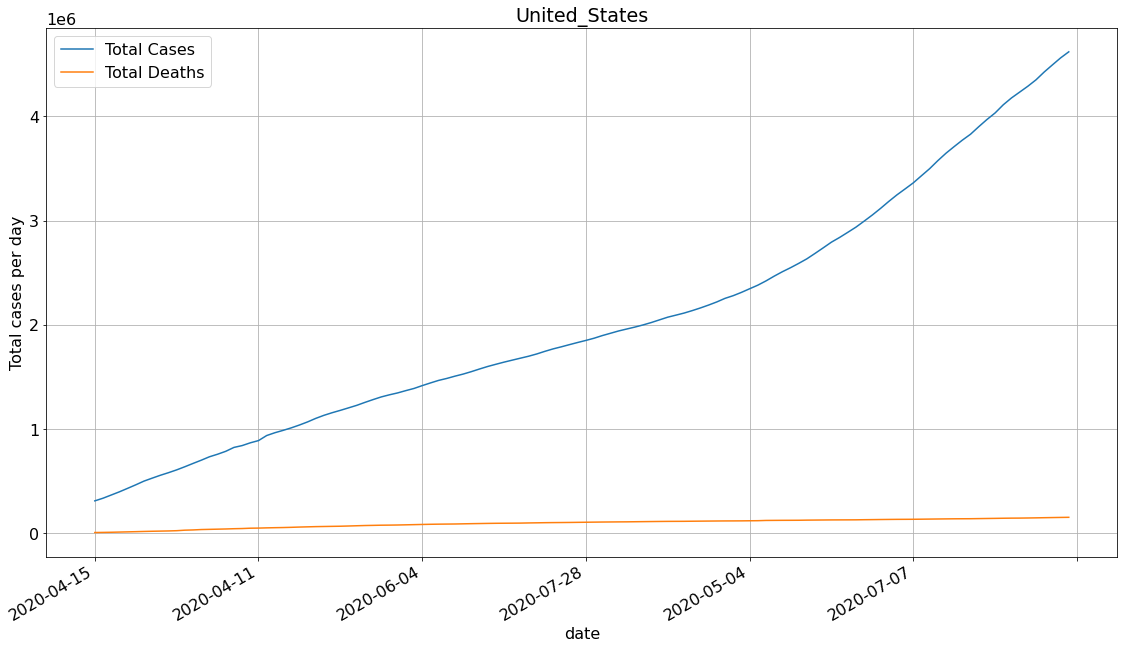

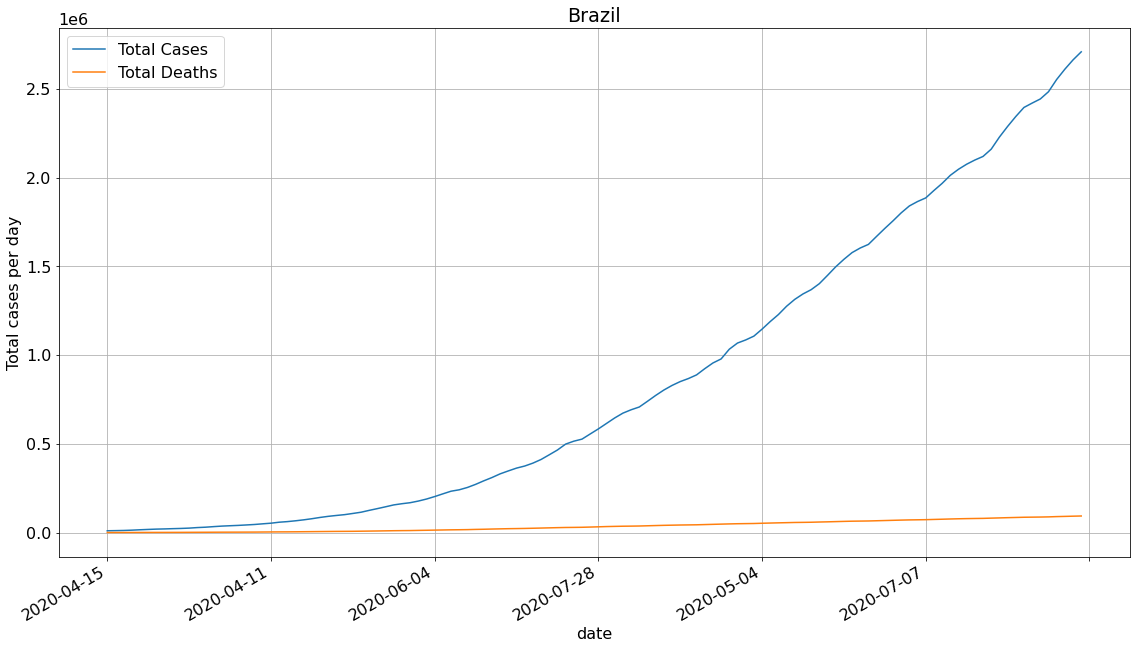

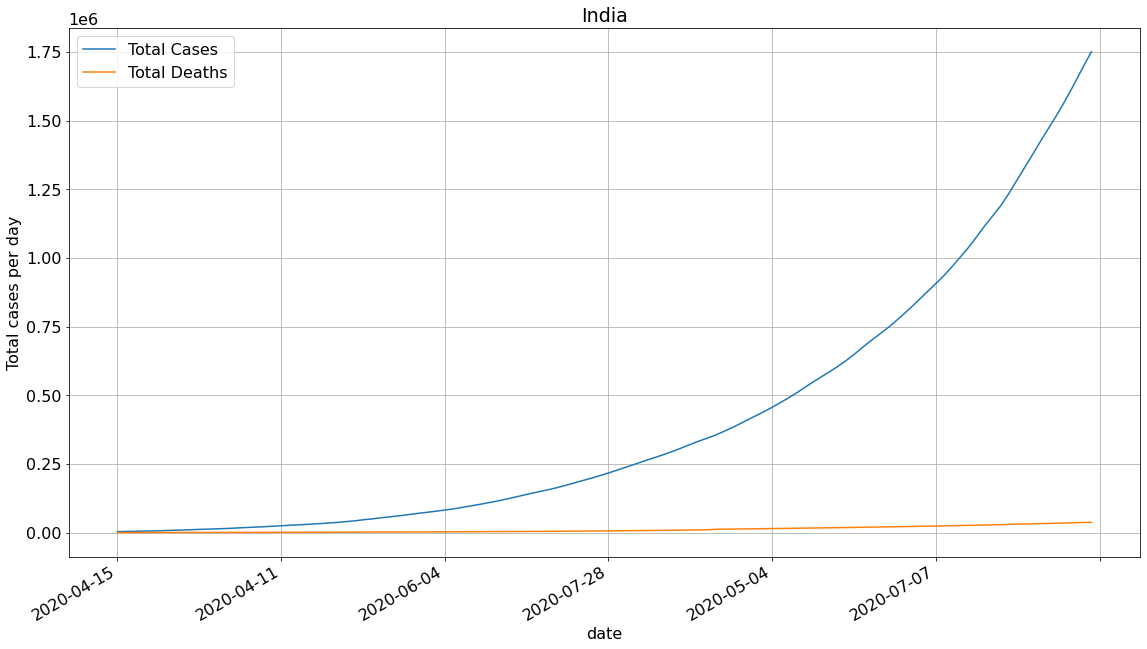

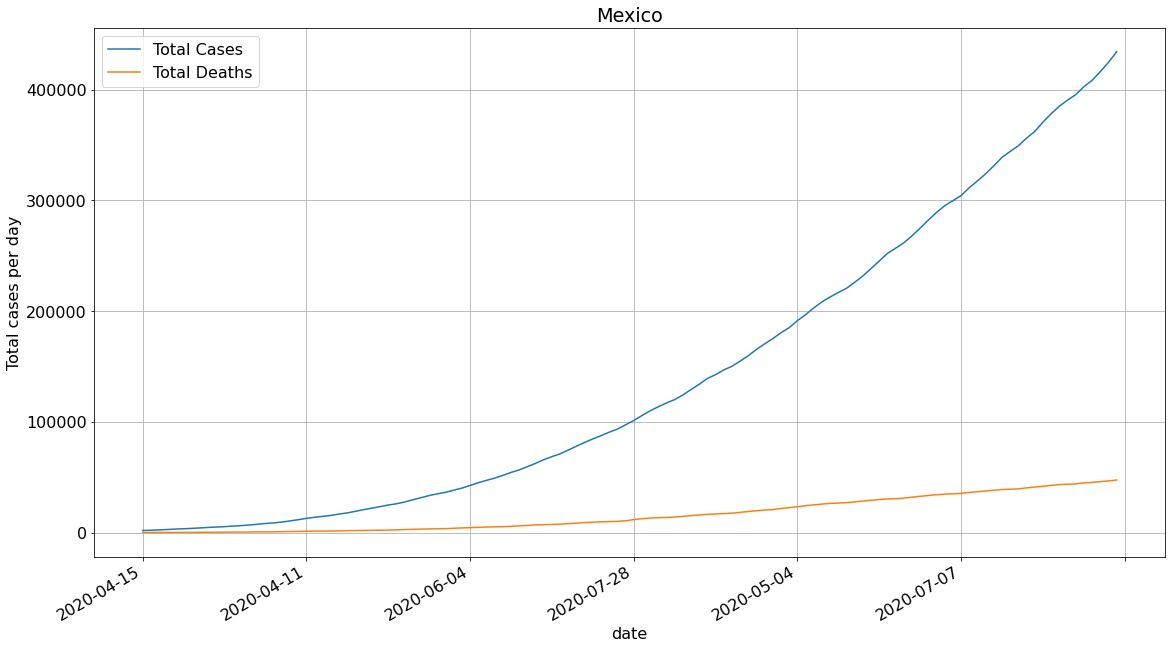

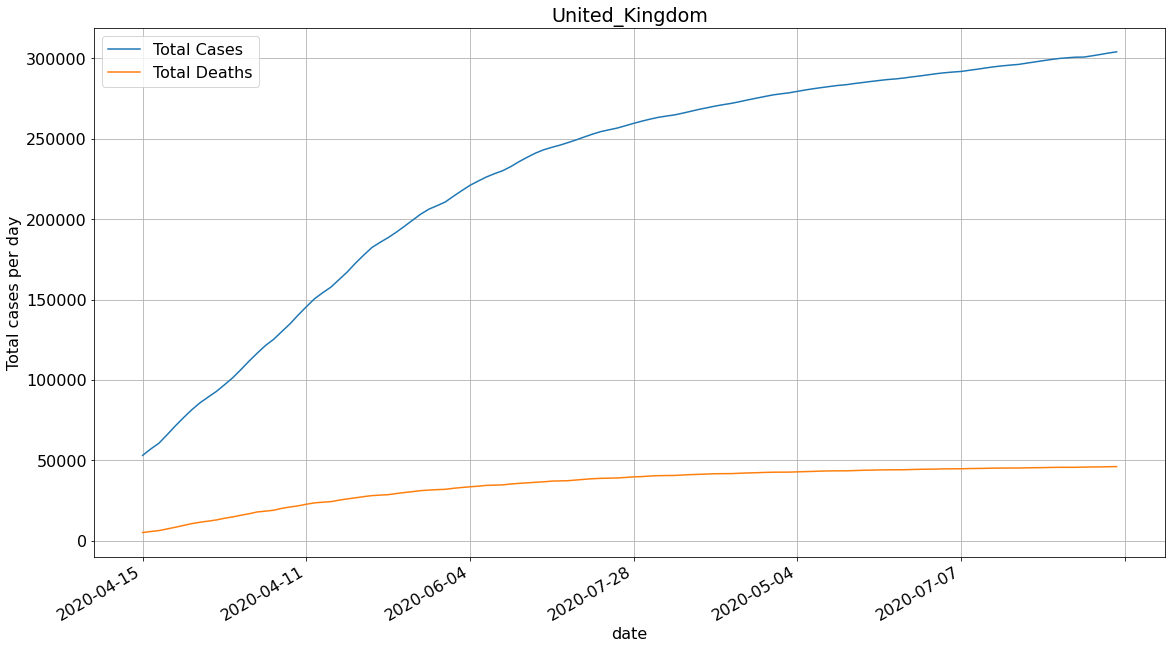

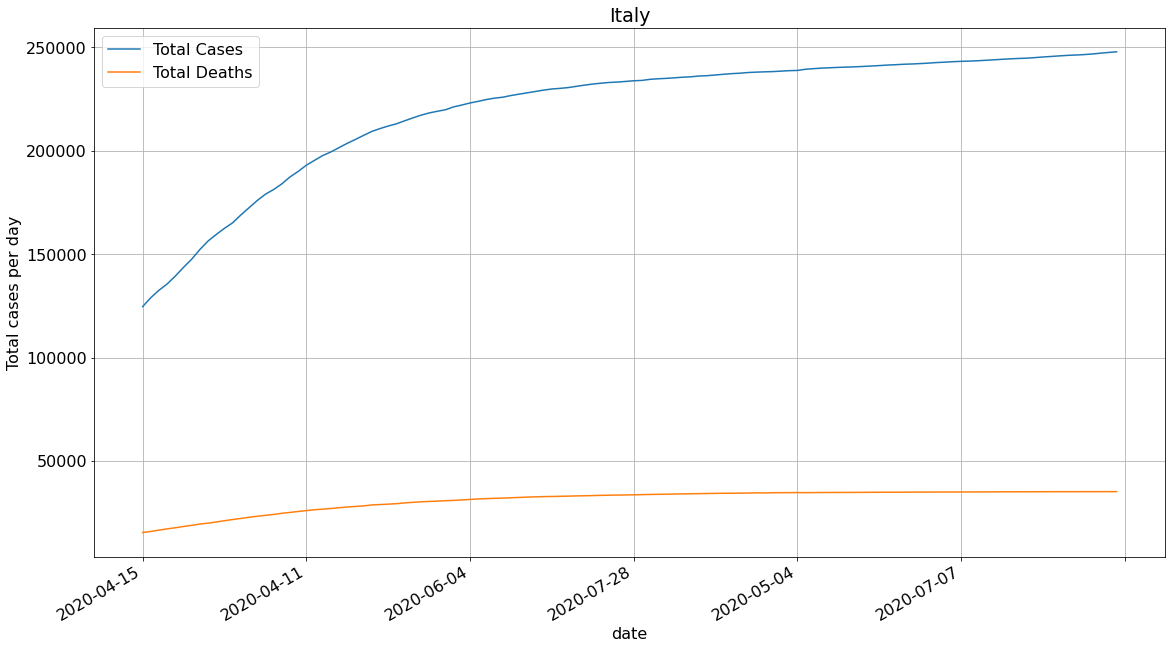

In [22]:
for index in range(len(dfCountry)):
    ax = dfTotalCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    dfTotalDeaths.plot(ax=ax, x='date', y=[dfCountry[index]])
    
    plt.ylabel('Total cases per day')
    ax.legend(["Total Cases", "Total Deaths"]);
    plt.title(dfCountry[index])
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Brazil Cases

In [23]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-04-05   Brazil      10278.0         432.0     1222.0        73.0
1   2020-04-06   Brazil      11130.0         486.0      852.0        54.0
2   2020-04-07   Brazil      12056.0         553.0      926.0        67.0
3   2020-04-08   Brazil      13717.0         667.0     1661.0       114.0
4   2020-04-09   Brazil      15927.0         800.0     2210.0       133.0
..         ...      ...          ...           ...        ...         ...
115 2020-07-29   Brazil    2483191.0       88539.0    40816.0       921.0
116 2020-07-30   Brazil    2552265.0       90134.0    69074.0      1595.0
117 2020-07-31   Brazil    2610102.0       91263.0    57837.0      1129.0
118 2020-08-01   Brazil    2662485.0       92475.0    52383.0      1212.0
119 2020-08-02   Brazil    2707877.0       93563.0    45392.0      1088.0

[120 rows x 6 columns]

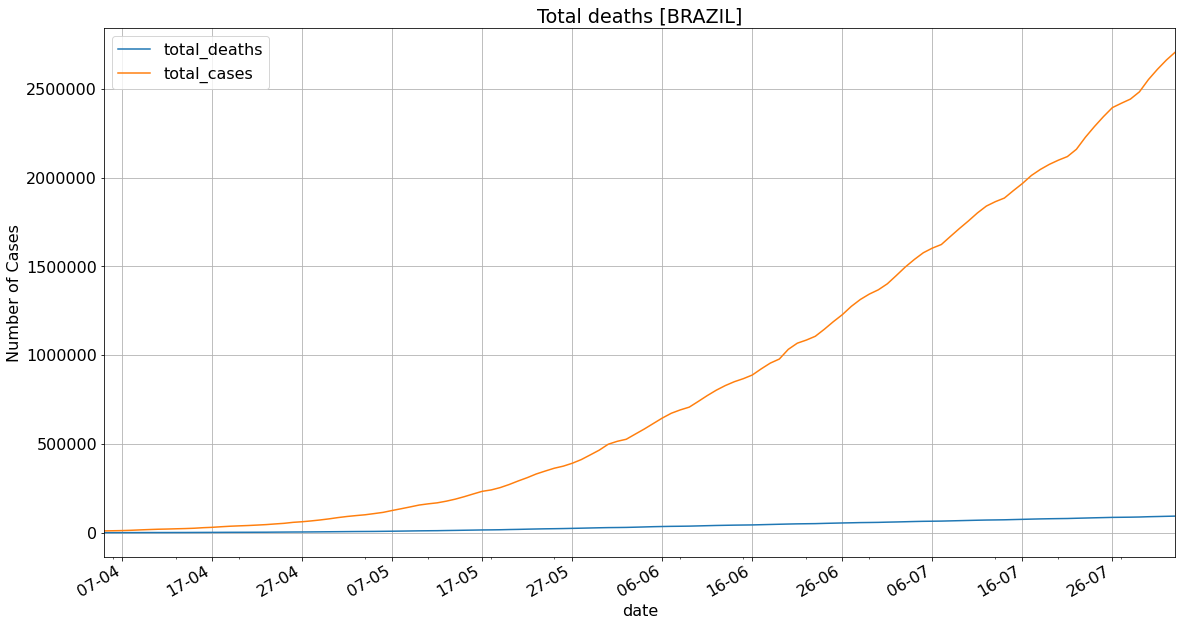

In [24]:
dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total deaths [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

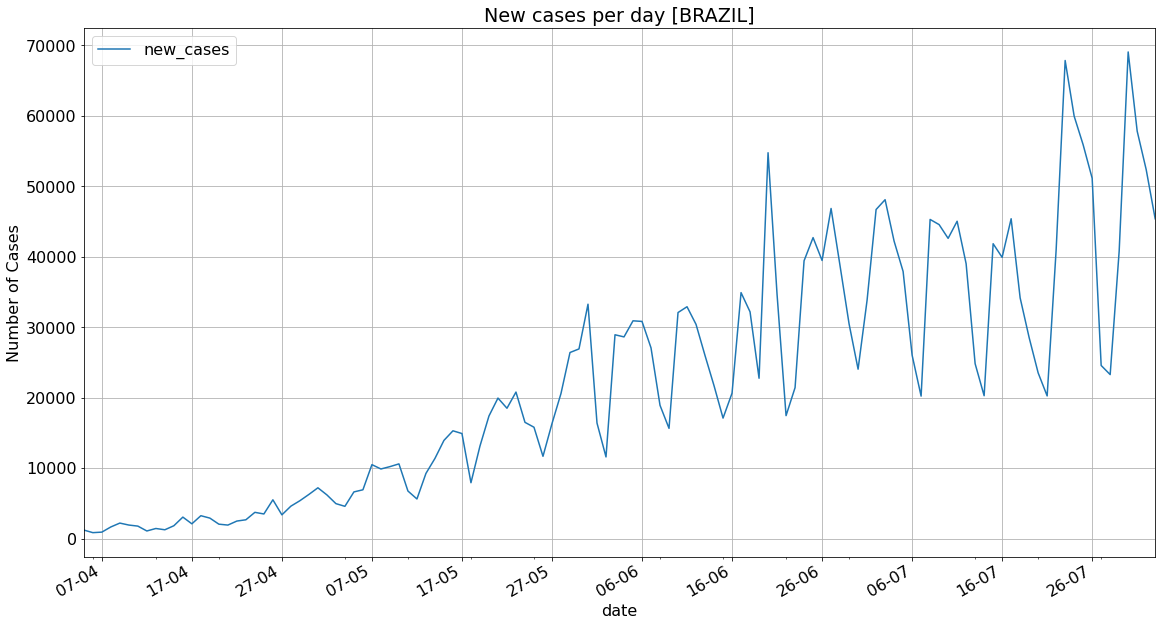

In [25]:
dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

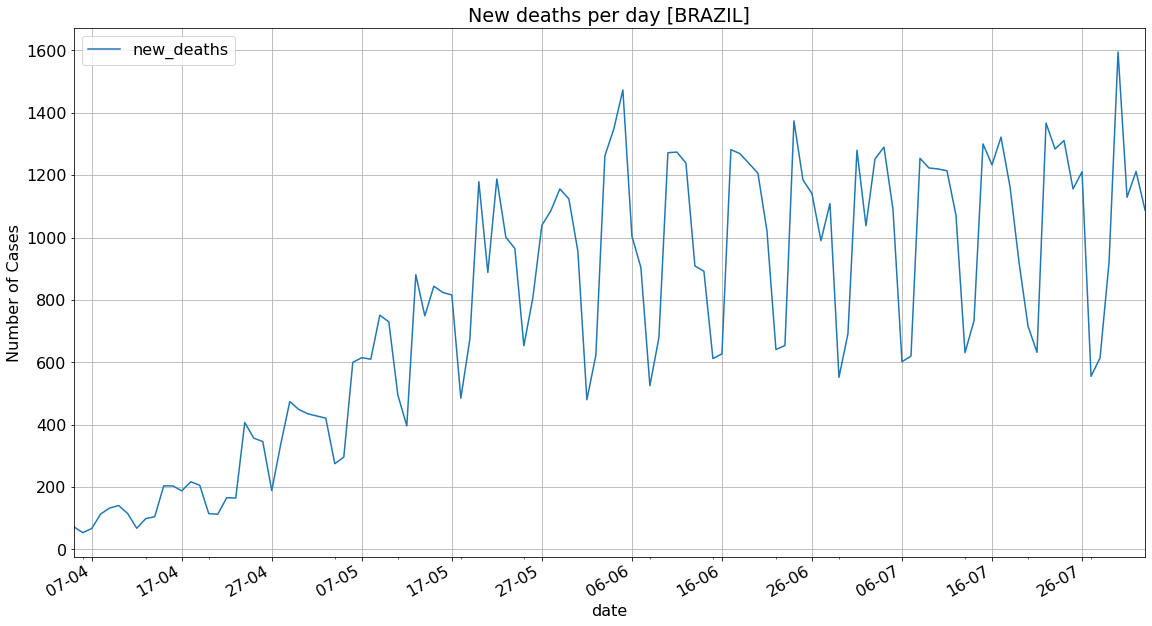

In [26]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [27]:
dfForecast = dfBrazil.copy()
dfForecast

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-04-05   Brazil      10278.0         432.0     1222.0        73.0
1   2020-04-06   Brazil      11130.0         486.0      852.0        54.0
2   2020-04-07   Brazil      12056.0         553.0      926.0        67.0
3   2020-04-08   Brazil      13717.0         667.0     1661.0       114.0
4   2020-04-09   Brazil      15927.0         800.0     2210.0       133.0
..         ...      ...          ...           ...        ...         ...
115 2020-07-29   Brazil    2483191.0       88539.0    40816.0       921.0
116 2020-07-30   Brazil    2552265.0       90134.0    69074.0      1595.0
117 2020-07-31   Brazil    2610102.0       91263.0    57837.0      1129.0
118 2020-08-01   Brazil    2662485.0       92475.0    52383.0      1212.0
119 2020-08-02   Brazil    2707877.0       93563.0    45392.0      1088.0

[120 rows x 6 columns]

In [28]:
dfForecast = dfBrazil.loc[:,['date','new_deaths']]
dfForecast

date  new_deaths
0   2020-04-05        73.0
1   2020-04-06        54.0
2   2020-04-07        67.0
3   2020-04-08       114.0
4   2020-04-09       133.0
..         ...         ...
115 2020-07-29       921.0
116 2020-07-30      1595.0
117 2020-07-31      1129.0
118 2020-08-01      1212.0
119 2020-08-02      1088.0

[120 rows x 2 columns]

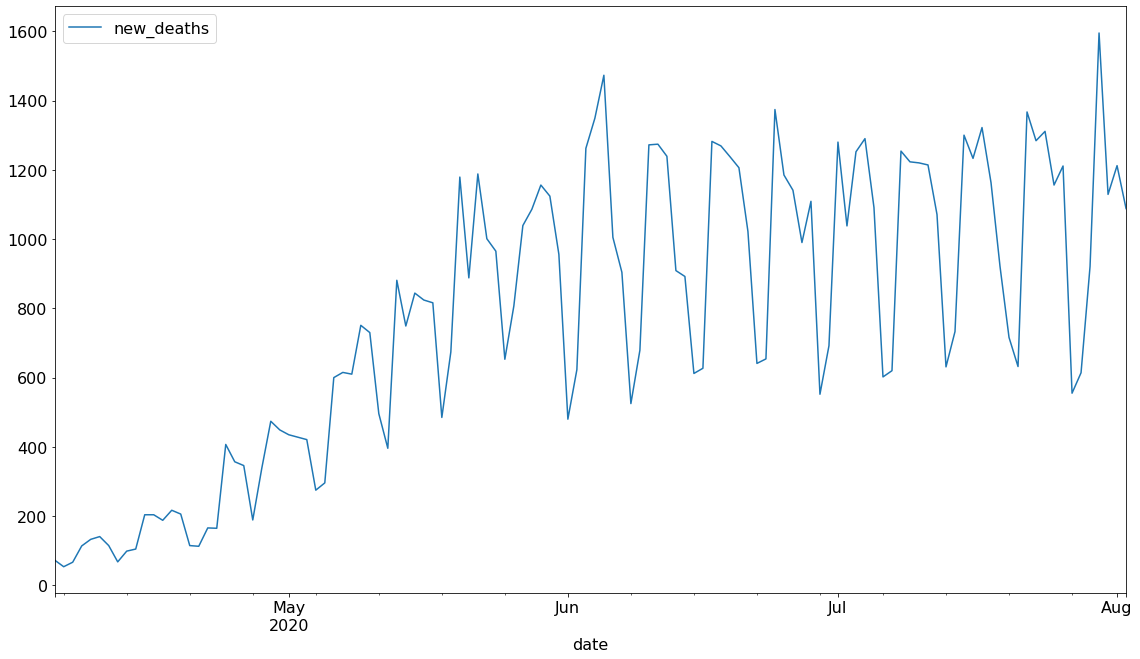

In [29]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

In [30]:
df_diff= dfForecast.copy()
df_diff['prev_cases'] = df_diff['new_deaths'].shift(1)

df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['new_deaths'] - df_diff['prev_cases'])

df_diff

date  new_deaths  prev_cases   diff
1   2020-04-06        54.0        73.0  -19.0
2   2020-04-07        67.0        54.0   13.0
3   2020-04-08       114.0        67.0   47.0
4   2020-04-09       133.0       114.0   19.0
5   2020-04-10       141.0       133.0    8.0
..         ...         ...         ...    ...
115 2020-07-29       921.0       614.0  307.0
116 2020-07-30      1595.0       921.0  674.0
117 2020-07-31      1129.0      1595.0 -466.0
118 2020-08-01      1212.0      1129.0   83.0
119 2020-08-02      1088.0      1212.0 -124.0

[119 rows x 4 columns]

In [31]:
plot_data = [go.Scatter(x=df_diff['date'],y=df_diff['diff'])]
plot_layout = go.Layout(title='Montly Deaths Diff')
plot_layout = go.Figure(data=plot_data, layout=plot_layout)
plot_layout.show()

In [32]:
#fig = go.Figure([go.Bar(x=df_diff['date'], y=df_diff['diff'])])
#fig.show()

In [58]:
df_supervised = df_diff.drop(['prev_cases'],axis=1)

for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
    
df_supervised = df_supervised.dropna().reset_index(drop=True)
df_supervised

date  new_deaths   diff  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  \
0   2020-04-18       217.0   29.0  -16.0    0.0   99.0    6.0   31.0  -47.0   
1   2020-04-19       206.0  -11.0   29.0  -16.0    0.0   99.0    6.0   31.0   
2   2020-04-20       115.0  -91.0  -11.0   29.0  -16.0    0.0   99.0    6.0   
3   2020-04-21       113.0   -2.0  -91.0  -11.0   29.0  -16.0    0.0   99.0   
4   2020-04-22       166.0   53.0   -2.0  -91.0  -11.0   29.0  -16.0    0.0   
..         ...         ...    ...    ...    ...    ...    ...    ...    ...   
102 2020-07-29       921.0  307.0   59.0 -656.0   55.0 -155.0   27.0  -83.0   
103 2020-07-30      1595.0  674.0  307.0   59.0 -656.0   55.0 -155.0   27.0   
104 2020-07-31      1129.0 -466.0  674.0  307.0   59.0 -656.0   55.0 -155.0   
105 2020-08-01      1212.0   83.0 -466.0  674.0  307.0   59.0 -656.0   55.0   
106 2020-08-02      1088.0 -124.0   83.0 -466.0  674.0  307.0   59.0 -656.0   

     lag_7  lag_8  lag_9  lag_10  lag_11  lag_12  
0    -26.0    8.0   19.0    47.0    13.0   -19.0  
1    -47.0  -26.0    8.0    19.0    47.0    13.0  
2     31.0  -47.0  -26.0     8.0    19.0    47.0  
3      6.0   31.0  -47.0   -26.0     8.0    19.0  
4     99.0    6.0   31.0   -47.0   -26.0     8.0  
..     ...    ...    ...     ...     ...     ...  
102  735.0  -84.0 -205.0  -242.0  -159.0    89.0  
103  -83.0  735.0  -84.0  -205.0  -242.0  -159.0  
104   27.0  -83.0  735.0   -84.0  -205.0  -242.0  
105 -155.0   27.0  -83.0   735.0   -84.0  -205.0  
106   55.0 -155.0   27.0   -83.0   735.0   -84.0  

[107 rows x 15 columns]

In [59]:
import statsmodels.formula.api as smf
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

-0.0048207682886469705


In [60]:
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 +lag_7+lag_8+lag_9+lag_10', data=df_supervised)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.757775754836824


In [61]:
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['new_deaths','date'],axis=1)#split train and test set
train_set, test_set = df_model[0:-10].values, df_model[-10:].values

In [62]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [63]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [64]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128,return_sequences=True, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [65]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/100
96/96 [==============================] - 1s 15ms/step - loss: 0.1090 - mse: 0.1090 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0518 - mse: 0.0518 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 3/100
96/96 [==============================] - 1s 9ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 3.7888e-04 - val_mse: 3.7888e-04
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 3.6361e-05 - val_mse: 3.6361e-05
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 4.4102e-05 - val_mse: 4.4102e-05
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 3.6741e-04 - val_mse: 3.6741e-04
Epoch 8/100
96/96 [==============================]

96/96 [==============================] - 0s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.6687e-04 - val_mse: 7.6687e-04
Epoch 63/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 1.7351e-04 - val_mse: 1.7351e-04
Epoch 64/100
96/96 [==============================] - 1s 7ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 7.1933e-04 - val_mse: 7.1933e-04
Epoch 65/100
96/96 [==============================] - 1s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 66/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 67/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 68/100
96/96 [==============================] - 1s 10ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 69/100
96/96 [==============================] - 1s 13ms/st

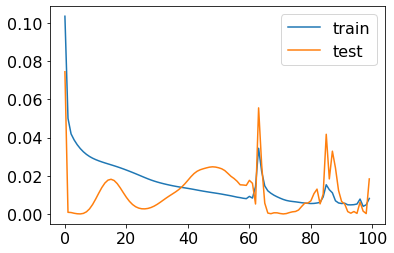

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [49]:
y_pred = model.predict(X_test,batch_size=1)

In [50]:
y_pred

array([[-0.05619356],
       [-0.5002133 ],
       [-0.2871355 ],
       [-1.0314555 ],
       [ 0.04976746],
       [ 0.6507243 ],
       [ 0.10251764],
       [-0.20048368],
       [-0.073617  ],
       [-0.9868841 ]], dtype=float32)

In [51]:
y_test

array([[-0.09597523],
       [-0.37770898],
       [-0.05263158],
       [-1.15325077],
       [-0.04643963],
       [ 0.3374613 ],
       [ 0.90557276],
       [-0.85913313],
       [-0.00928793],
       [-0.32972136]])

In [52]:
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))#reshape pred_test_set

pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[-0.05619356 -0.26625387  1.02349256 -0.25920125 -0.44870791 -0.50665623
  -0.37666406  0.01174628 -0.23257635  0.76037588  0.0321065  -0.81675803
  -0.35160532]]
[[-0.50021333 -0.09597523 -0.25763508  1.02349256 -0.25920125 -0.44870791
  -0.50665623 -0.37666406  0.01174628 -0.23257635  0.76037588  0.0321065
  -0.81675803]]
[[-0.28713551 -0.37770898 -0.0853563  -0.25763508  1.02349256 -0.25920125
  -0.44870791 -0.50665623 -0.37666406  0.01174628 -0.23257635  0.76037588
   0.0321065 ]]
[[-1.03145552 -0.05263158 -0.37039937 -0.0853563  -0.25763508  1.02349256
  -0.25920125 -0.44870791 -0.50665623 -0.37666406  0.01174628 -0.23257635
   0.76037588]]
[[ 0.04976746 -1.15325077 -0.04150352 -0.37039937 -0.0853563  -0.25763508
   1.02349256 -0.25920125 -0.44870791 -0.50665623 -0.37666406  0.01174628
  -0.23257635]]
[[ 0.65072429 -0.04643963 -1.1550509  -0.04150352 -0.37039937 -0.0853563
  -0.25763508  1.02349256 -0.25920125 -0.44870791 -0.50665623 -0.37666406
   0.01174628]]
[[ 0.10251764  0.3

In [53]:
result_list = []
sales_dates = list(dfForecast[-11:].date)
act_sales = list(dfForecast[-11:].new_deaths)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)#for multistep prediction, replace act_sales with the predicted sales

In [54]:
df_result

pred_value       date
0        1336 2020-07-24
1        1076 2020-07-25
2        1059 2020-07-26
3         633 2020-07-27
4         676 2020-07-28
5        1123 2020-07-29
6        1076 2020-07-30
7        1554 2020-07-31
8        1170 2020-08-01
9         663 2020-08-02

In [55]:
df_deaths_pred = pd.merge(dfForecast, df_result, on='date', how='left')

plot_data = [go.Scatter(x=df_deaths_pred['date'], y=df_deaths_pred['new_deaths'], name='actual'),
            go.Scatter(x=df_deaths_pred['date'], y=df_deaths_pred['pred_value'], name='predicted')
            ]

plot_layout = go.Layout(title='Deaths Prediction')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [56]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual  Predicted
0 -0.09598   -0.05619
1 -0.37771   -0.50021
2 -0.05263   -0.28714
3 -1.15325   -1.03146
4 -0.04644    0.04977
5  0.33746    0.65072
6  0.90557    0.10252
7 -0.85913   -0.20048
8 -0.00929   -0.07362
9 -0.32972   -0.98688

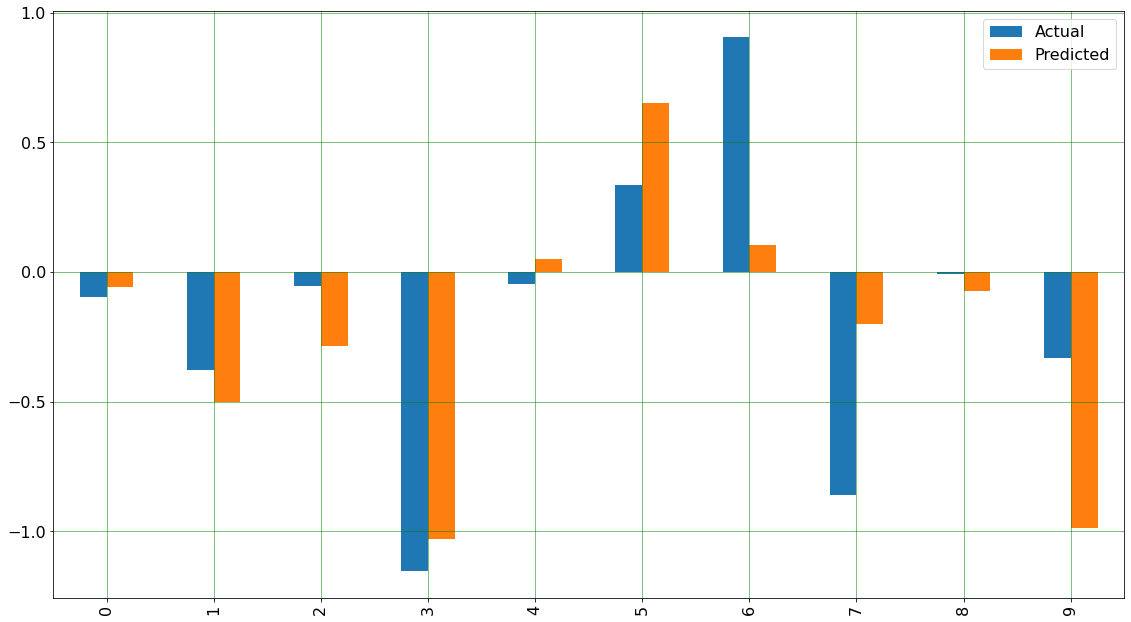

In [57]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Forecast to new deaths in World

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [ ]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

In [ ]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [ ]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

In [ ]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to new deaths per day [BRAZIL]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

In [ ]:
df

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [ ]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [ ]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

In [ ]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

In [ ]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()

In [ ]:
#newDf_list=[]
#for index in range(len(dfCountry)):  
#    newDf = [d[index]['total_cases']]
#    header = [dfCountry[index]]
#    newDf = pd.concat(newDf, axis=1, keys=header)
#    newDf_list.append(newDf)

In [ ]:
#dfConcat = []
#for index in range(len(dfCountry)):
#    dfConcat = pd.concat(newDf_list, axis=1)
#dfConcat.insert(0, 'date', myDate)
#dfConcat.sort_values(by=['date'], ascending=False)

In [ ]:
# for index in range(len(dfCountry)):
#     dfTotalCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
#     plt.ylabel('Total cases per day')
    
#     ax = plt.gca()
#     plt.gcf().autofmt_xdate()
#     plt.grid()